In [302]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# DATA IMPORT

### Import csv

In [303]:
df = pd.read_csv("Ruple_Morley.PLoS_ONE_2016.VMDB_Lymphoma_Case_Control.csv", encoding='latin-1')
df

,VISIT_ID,INSTITUTION_ID,NAME,DISCHARGEYEAR,YearOfDC_code,Breed_LAB REF,BREED_DESC,AKC_GROUP_Mix=0_Sporting=1_Working=2_Herding=3_Hound=4_Toy=5_Nonsport=6_Terrier=7_OtherPurebred=8,DISCHARGE_Alive=0_Died=1,Agecat_LT1=0_1to2=1_2to4=2_4to7=3_7to10=4_10to15=5_GT15=6,Sex_Status_FI=0_FN=1_MI=2_MN=3_Unk=4,WTCAT_0to15=0_15to30=1_30to50=2_50to75=3_75to100=4_100+=5_Unk=6,Case_Control_0=case
0,1242402,1,Michigan State University,2006,17,1,Mixed breed dog,0,0,4,1,1,1
1,1198744,1,Michigan State University,2006,17,1,Mixed breed dog,0,0,5,1,2,1
2,1198744,1,Michigan State University,2006,17,1,Mixed breed dog,0,0,5,1,2,1
3,1242535,1,Michigan State University,2006,17,1,Mixed breed dog,0,0,4,1,3,1
4,993414,1,Michigan State University,2006,17,1,Mixed breed dog,0,0,5,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67707,8246958,24,University of Pennsylvani,1990,1,106,Australian Kelpie,8,0,3,3,3,0
67708,1176647,1,Michigan State University,2007,18,106,Alaskan Klee Kai,8,0,3,3,3,0
67709,2569440,13,University of Illinois,2000,11,106,Akbash,8,0,5,1,4,0
67710,1505976,15,Colorado State University,2007,18,106,Akbash,8,0,3,1,4,0


### Clear column names

In [304]:
df.rename(columns={
    "AKC_GROUP_Mix=0_Sporting=1_Working=2_Herding=3_Hound=4_Toy=5_Nonsport=6_Terrier=7_OtherPurebred=8": "AKC_GROUP_Mix",
    "Agecat_LT1=0_1to2=1_2to4=2_4to7=3_7to10=4_10to15=5_GT15=6": "Agecat_LT1",
    "Sex_Status_FI=0_FN=1_MI=2_MN=3_Unk=4": "Sex_Status_FI",
    "WTCAT_0to15=0_15to30=1_30to50=2_50to75=3_75to100=4_100+=5_Unk=6": "WTCAT_0to15",
    "Case_Control_0=case": "Case_Control",
    "DISCHARGE_Alive=0_Died=1": "DISCHARGE_Alive",
    "Breed_LAB REF": "Breed",
}, inplace=True)
df

,VISIT_ID,INSTITUTION_ID,NAME,DISCHARGEYEAR,YearOfDC_code,Breed,BREED_DESC,AKC_GROUP_Mix,DISCHARGE_Alive,Agecat_LT1,Sex_Status_FI,WTCAT_0to15,Case_Control
0,1242402,1,Michigan State University,2006,17,1,Mixed breed dog,0,0,4,1,1,1
1,1198744,1,Michigan State University,2006,17,1,Mixed breed dog,0,0,5,1,2,1
2,1198744,1,Michigan State University,2006,17,1,Mixed breed dog,0,0,5,1,2,1
3,1242535,1,Michigan State University,2006,17,1,Mixed breed dog,0,0,4,1,3,1
4,993414,1,Michigan State University,2006,17,1,Mixed breed dog,0,0,5,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67707,8246958,24,University of Pennsylvani,1990,1,106,Australian Kelpie,8,0,3,3,3,0
67708,1176647,1,Michigan State University,2007,18,106,Alaskan Klee Kai,8,0,3,3,3,0
67709,2569440,13,University of Illinois,2000,11,106,Akbash,8,0,5,1,4,0
67710,1505976,15,Colorado State University,2007,18,106,Akbash,8,0,3,1,4,0


In [305]:
categorical_cols = ["NAME", "BREED_DESC"]

# DATA PREPROCESSING

## Data shape

In [306]:
df.isna().sum()

VISIT_ID           0
INSTITUTION_ID     0
NAME               0
DISCHARGEYEAR      0
YearOfDC_code      0
Breed              0
BREED_DESC         0
AKC_GROUP_Mix      0
DISCHARGE_Alive    0
Agecat_LT1         0
Sex_Status_FI      0
WTCAT_0to15        0
Case_Control       0
dtype: int64

In [307]:
df.isnull().sum()

VISIT_ID           0
INSTITUTION_ID     0
NAME               0
DISCHARGEYEAR      0
YearOfDC_code      0
Breed              0
BREED_DESC         0
AKC_GROUP_Mix      0
DISCHARGE_Alive    0
Agecat_LT1         0
Sex_Status_FI      0
WTCAT_0to15        0
Case_Control       0
dtype: int64

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67712 entries, 0 to 67711
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VISIT_ID         67712 non-null  int64 
 1   INSTITUTION_ID   67712 non-null  int64 
 2   NAME             67712 non-null  object
 3   DISCHARGEYEAR    67712 non-null  int64 
 4   YearOfDC_code    67712 non-null  int64 
 5   Breed            67712 non-null  int64 
 6   BREED_DESC       67712 non-null  object
 7   AKC_GROUP_Mix    67712 non-null  int64 
 8   DISCHARGE_Alive  67712 non-null  int64 
 9   Agecat_LT1       67712 non-null  int64 
 10  Sex_Status_FI    67712 non-null  int64 
 11  WTCAT_0to15      67712 non-null  int64 
 12  Case_Control     67712 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 6.7+ MB


In [309]:
df.describe()

,VISIT_ID,INSTITUTION_ID,DISCHARGEYEAR,YearOfDC_code,Breed,AKC_GROUP_Mix,DISCHARGE_Alive,Agecat_LT1,Sex_Status_FI,WTCAT_0to15,Case_Control
count,6.771200e+04,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000
mean,4.239752e+06,11.767707,1999.064981,10.064981,28.558808,2.349465,0.091889,3.734656,1.785311,3.386357,0.278030
std,3.068496e+06,7.369968,5.784768,5.784768,30.661065,2.092843,0.288872,1.072463,1.009181,1.955704,0.448032
min,3.274000e+03,1.000000,1989.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.546523e+06,7.000000,1994.000000,5.000000,1.000000,1.000000,0.000000,3.000000,1.000000,2.000000,0.000000
50%,3.085000e+06,13.000000,1999.000000,10.000000,19.000000,2.000000,0.000000,4.000000,2.000000,3.000000,0.000000
75%,6.289510e+06,15.000000,2004.000000,15.000000,51.000000,4.000000,0.000000,5.000000,3.000000,5.000000,1.000000
max,1.083677e+07,31.000000,2011.000000,22.000000,106.000000,8.000000,1.000000,6.000000,4.000000,6.000000,1.000000


In [310]:
df.duplicated().sum()

1972

In [311]:
df.drop_duplicates(inplace=True)
df.count()

VISIT_ID           65740
INSTITUTION_ID     65740
NAME               65740
DISCHARGEYEAR      65740
YearOfDC_code      65740
Breed              65740
BREED_DESC         65740
AKC_GROUP_Mix      65740
DISCHARGE_Alive    65740
Agecat_LT1         65740
Sex_Status_FI      65740
WTCAT_0to15        65740
Case_Control       65740
dtype: int64

## Identification of outliers

<Axes: >

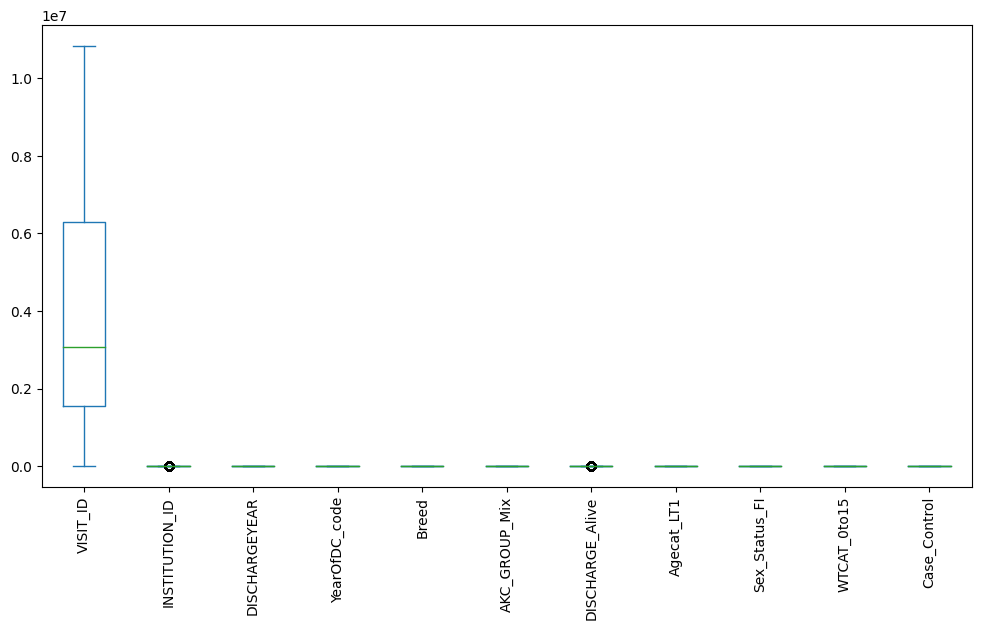

In [312]:
df.plot(kind='box', figsize=(12, 6), rot=90)

In [313]:
def identify_outliers_with_IQR(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    return outliers

In [314]:
def identify_outliers_with_std(dataframe, column, n_std=2):
    column_data = dataframe[column]
    lim_sup = column_data.mean() + (column_data.std() *  n_std)
    lim_inf = column_data.mean() - (column_data.std() *  n_std)
    print(f"Upper limit: {lim_sup}, Lower limit: {lim_inf}")
    outliers = dataframe[(dataframe[column] > lim_sup) | (dataframe[column] < lim_inf)]
    return outliers

### Outliers detection in "INSTITUTION_ID"

In [315]:
df_institution_id_outliers = identify_outliers_with_std(df, "INSTITUTION_ID")
df_institution_id_outliers.sort_values(by="INSTITUTION_ID", ascending=False)

Upper limit: 26.60611223038558, Lower limit: -2.9090024037959843


,VISIT_ID,INSTITUTION_ID,NAME,DISCHARGEYEAR,YearOfDC_code,Breed,BREED_DESC,AKC_GROUP_Mix,DISCHARGE_Alive,Agecat_LT1,Sex_Status_FI,WTCAT_0to15,Case_Control
7985,1433052,31,Mississippi State Univers,2006,17,1,Mixed breed,0,1,5,1,1,0
51114,693659,31,Mississippi State Univers,2004,15,52,Beagle,4,0,6,3,2,1
33011,1116344,31,Mississippi State Univers,2006,17,19,Rottweiler,2,0,4,3,5,0
18015,1433062,31,Mississippi State Univers,2006,17,0,Labrador retriever,1,0,2,1,3,0
18014,874543,31,Mississippi State Univers,2005,16,0,Labrador retriever,1,0,4,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28263,2386609,29,University of Florida,1994,5,3,American Cocker Sp,1,0,3,1,6,0
28264,2393913,29,University of Florida,1995,6,3,American Cocker Sp,1,0,3,2,6,0
28265,2394372,29,University of Florida,1995,6,3,American Cocker Sp,1,0,3,3,6,0
28266,2394944,29,University of Florida,1995,6,3,American Cocker Sp,1,0,4,2,6,0


<Axes: >

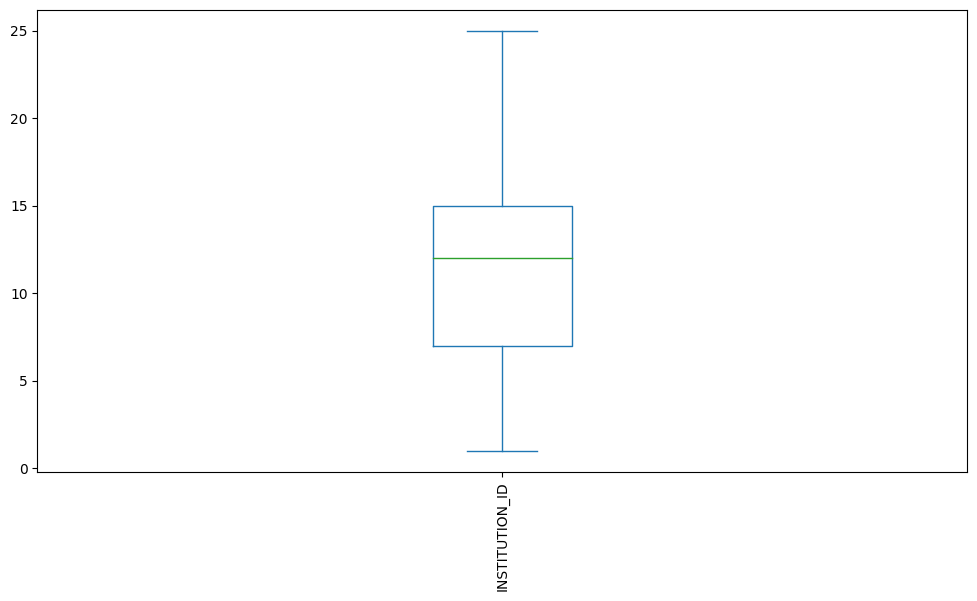

In [316]:
df_institution_clear_of_id_outliers = df[~df["INSTITUTION_ID"].isin(df_institution_id_outliers["INSTITUTION_ID"])]
df_institution_clear_of_id_outliers[["INSTITUTION_ID"]].plot(kind='box', figsize=(12, 6), rot=90)

**Note:** INSTITUTION_ID has not outliers actually because, in docs, the value range is in 1 and 31

### Outliers detection in "DISCHARGE_Alive"

In [317]:
df_discharge_alive_outliers = identify_outliers_with_std(df, "DISCHARGE_Alive")
df_discharge_alive_outliers.sort_values(by="DISCHARGE_Alive", ascending=False)

Upper limit: 0.6276064461770965, Lower limit: -0.4651482776343523


,VISIT_ID,INSTITUTION_ID,NAME,DISCHARGEYEAR,YearOfDC_code,Breed,BREED_DESC,AKC_GROUP_Mix,DISCHARGE_Alive,Agecat_LT1,Sex_Status_FI,WTCAT_0to15,Case_Control
31,1244173,1,Michigan State University,2007,18,1,Mixed breed dog,0,1,4,3,4,1
44428,8731993,7,Purdue University,1994,5,39,Shetland Sheepdog,3,1,5,2,0,1
44415,8722680,7,Purdue University,1993,4,39,Shetland Sheepdog,3,1,5,1,3,1
44410,8704690,7,Purdue University,1990,1,39,Shetland Sheepdog,3,1,4,3,2,1
44401,8007780,6,Ontario Veterinary Colleg,1991,2,39,Shetland Sheepdog,3,1,3,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23037,1425080,15,Colorado State University,1995,6,2,Golden Retriever,1,1,5,1,6,1
23032,1416999,15,Colorado State University,1994,5,2,Golden Retriever,1,1,3,1,2,1
23026,1413920,15,Colorado State University,1994,5,2,Golden Retriever,1,1,3,2,3,1
23024,1410126,15,Colorado State University,1993,4,2,Golden Retriever,1,1,1,1,3,1


<Axes: >

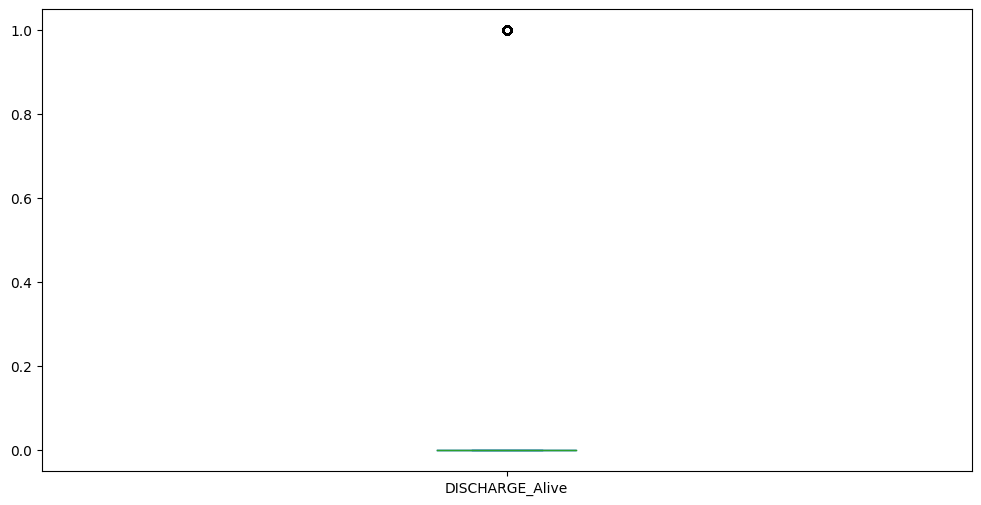

In [318]:
df[["DISCHARGE_Alive"]].plot(kind='box', figsize=(12, 6))

**NOTE:** "DISCHARGE_Alive" has not outliers because the values of this column is 0 or 1, but there are much less 1 than 0

### Outlier detection with DBScan

In [319]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors


#### eps calculation to DBScan algorithm

In [320]:
features_for_outliers = ['AKC_GROUP_Mix', 'Agecat_LT1', 'Sex_Status_FI', 'WTCAT_0to15', 'DISCHARGE_Alive']

X_outliers = df[features_for_outliers].copy()
X_outliers_scaled = StandardScaler().fit_transform(X_outliers)

In [321]:
k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(X_outliers_scaled)
distances, indices = neighbors.kneighbors(X_outliers_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


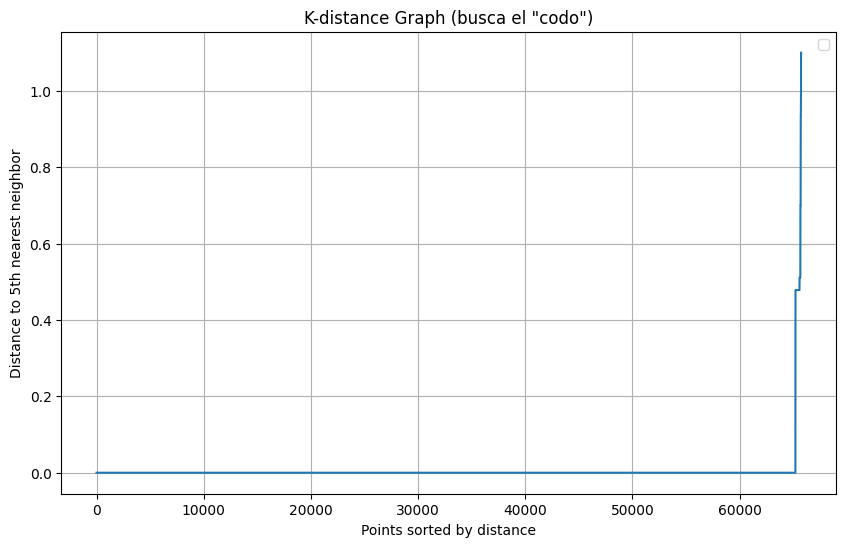

In [322]:
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {k}th nearest neighbor')
plt.title('K-distance Graph (busca el "codo")')
plt.grid(True)
# plt.axhline(y=0.5, color='r', linestyle='--', label='eps candidate')
plt.legend()
plt.show()

In [323]:
from sklearn.metrics import silhouette_score

In [324]:
dbscan = DBSCAN(eps=0.45, min_samples=5)
y_pred = dbscan.fit_predict(X_outliers)
y_pred

array([ 0,  1,  2, ..., -1, -1, -1], dtype=int64)

In [325]:
score = silhouette_score(X_outliers, y_pred)
sil_score = score

In [326]:
sil_score

0.941100812362445

**NOTE:** We note that with eps in 0.45 and min_samples in 5, we had a good porcentage of sil_score, so we will use those values to fit the DBScan algorithm

#### DBScan fit

In [327]:
dbscan = DBSCAN(eps=0.45, min_samples=5)
clusters = dbscan.fit_predict(X_outliers_scaled)

df['dbscan_cluster'] = clusters
outlier_count = (clusters == -1).sum()
print(f"Outliers detected by DBSCAN: {outlier_count} ({outlier_count/len(df)*100:.2f}%)")
print(f"\nDistribution of clusters:")
print(df['dbscan_cluster'].value_counts().sort_index())

Outliers detected by DBSCAN: 2149 (3.27%)

Distribution of clusters:
dbscan_cluster
-1       2149
 0        188
 1        446
 2        541
 3        512
         ... 
 1227       9
 1228       5
 1229       9
 1230       6
 1231      10
Name: count, Length: 1233, dtype: int64


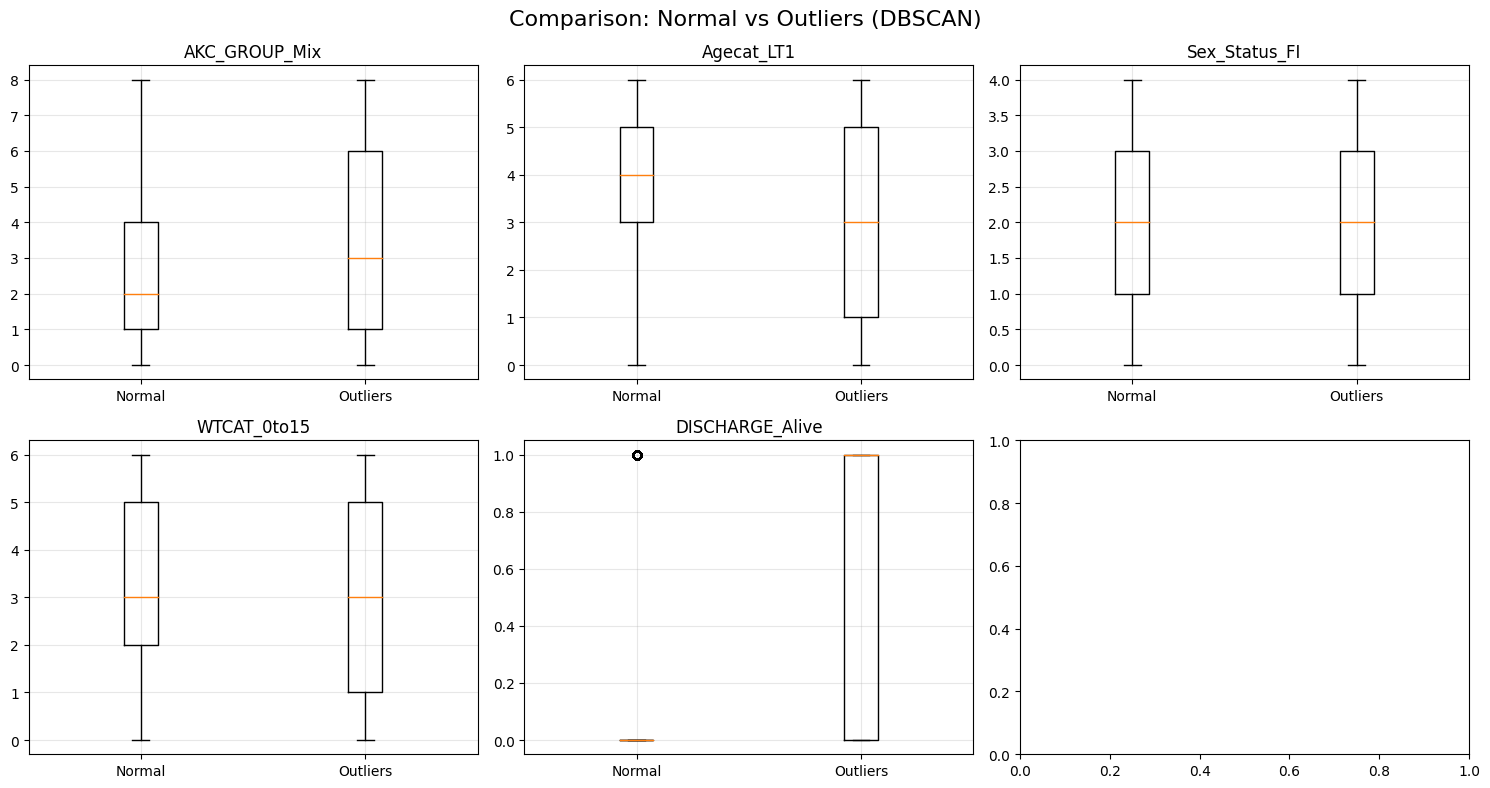

In [328]:
df_outliers_dbscan = df[df['dbscan_cluster'] == -1]
df_normal_dbscan = df[df['dbscan_cluster'] != -1]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Comparison: Normal vs Outliers (DBSCAN)', fontsize=16)

for idx, col in enumerate(features_for_outliers):
    ax = axes[idx // 3, idx % 3]
    data_to_plot = [df_normal_dbscan[col], df_outliers_dbscan[col]]
    ax.boxplot(data_to_plot, labels=['Normal', 'Outliers'])
    ax.set_title(col)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [329]:
from scipy.stats import chi2_contingency

In [330]:
contingency = pd.crosstab(df['dbscan_cluster'] == -1, df['Case_Control'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi2: {chi2}, p-value: {p}")
if p < 0.05:
    print("There is a significant association between being an outlier and Case_Control status.")
else:
    print("No significant association between being an outlier and Case_Control status.")

Chi2: 22.08443815325235, p-value: 2.609163744613339e-06
There is a significant association between being an outlier and Case_Control status.


In [331]:
df.drop(columns=['dbscan_cluster'], inplace=True)

**NOTE:** We see that by chi2 test the outliers have a significant association with the variable target. For that reazon the data will be not clean or modified

## Clear categorical values from text

There are categorical values that have references by label id in another column. To work with that dataframe, that categorical text data will be droped.

In [332]:
df = df.drop(columns=categorical_cols)
df

,VISIT_ID,INSTITUTION_ID,DISCHARGEYEAR,YearOfDC_code,Breed,AKC_GROUP_Mix,DISCHARGE_Alive,Agecat_LT1,Sex_Status_FI,WTCAT_0to15,Case_Control
0,1242402,1,2006,17,1,0,0,4,1,1,1
1,1198744,1,2006,17,1,0,0,5,1,2,1
3,1242535,1,2006,17,1,0,0,4,1,3,1
4,993414,1,2006,17,1,0,0,5,1,3,1
5,1086608,1,2006,17,1,0,0,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
67707,8246958,24,1990,1,106,8,0,3,3,3,0
67708,1176647,1,2007,18,106,8,0,3,3,3,0
67709,2569440,13,2000,11,106,8,0,5,1,4,0
67710,1505976,15,2007,18,106,8,0,3,1,4,0


## Summary
* We can see that there are 67712 data rows
* There are no null or NAN data
* There are no outliers

# EDA

### Types of dog breed with count

In [333]:
df[["Breed"]].groupby("Breed").size().sort_values(ascending=False)

Breed
1      13733
0       6809
2       4625
38      3104
51      2601
       ...  
75        60
105       57
48        56
76        53
35        53
Length: 100, dtype: int64

### Groups of dog breeds according to the AKC

In [334]:
df[["AKC_GROUP_Mix"]].groupby("AKC_GROUP_Mix").size().sort_values(ascending=False)

AKC_GROUP_Mix
1    16839
0    13733
2     9108
3     7168
4     6608
5     5401
6     3564
7     3183
8      136
dtype: int64

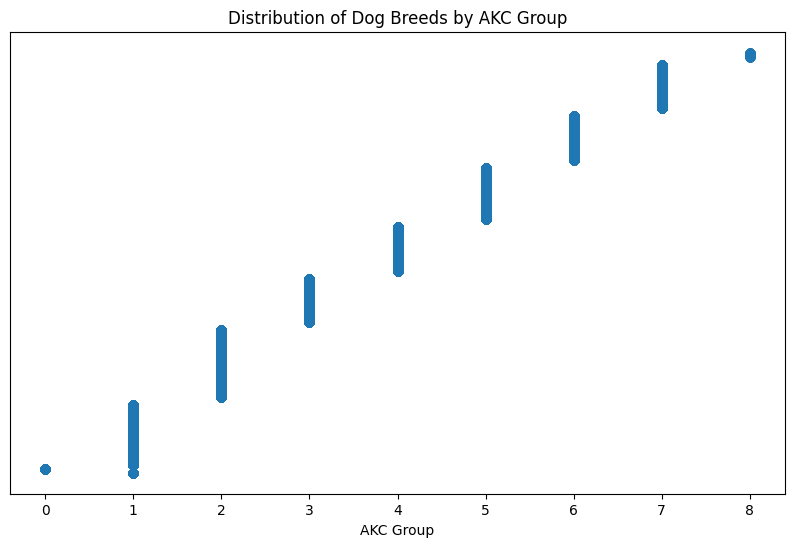

In [335]:
plt.figure(figsize=(10,6))
plt.title("Distribution of Dog Breeds by AKC Group")
plt.scatter(x=df["AKC_GROUP_Mix"], y=df["Breed"])
plt.yticks([])
plt.xlabel("AKC Group")
plt.show()

### Function to build correlation matrix heatmap plot

In [336]:
def plot_correlation_heatmap(dataframe):
    plt.figure(figsize=(12,10))
    sns.heatmap(dataframe, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.show()

### Show correlation matrix

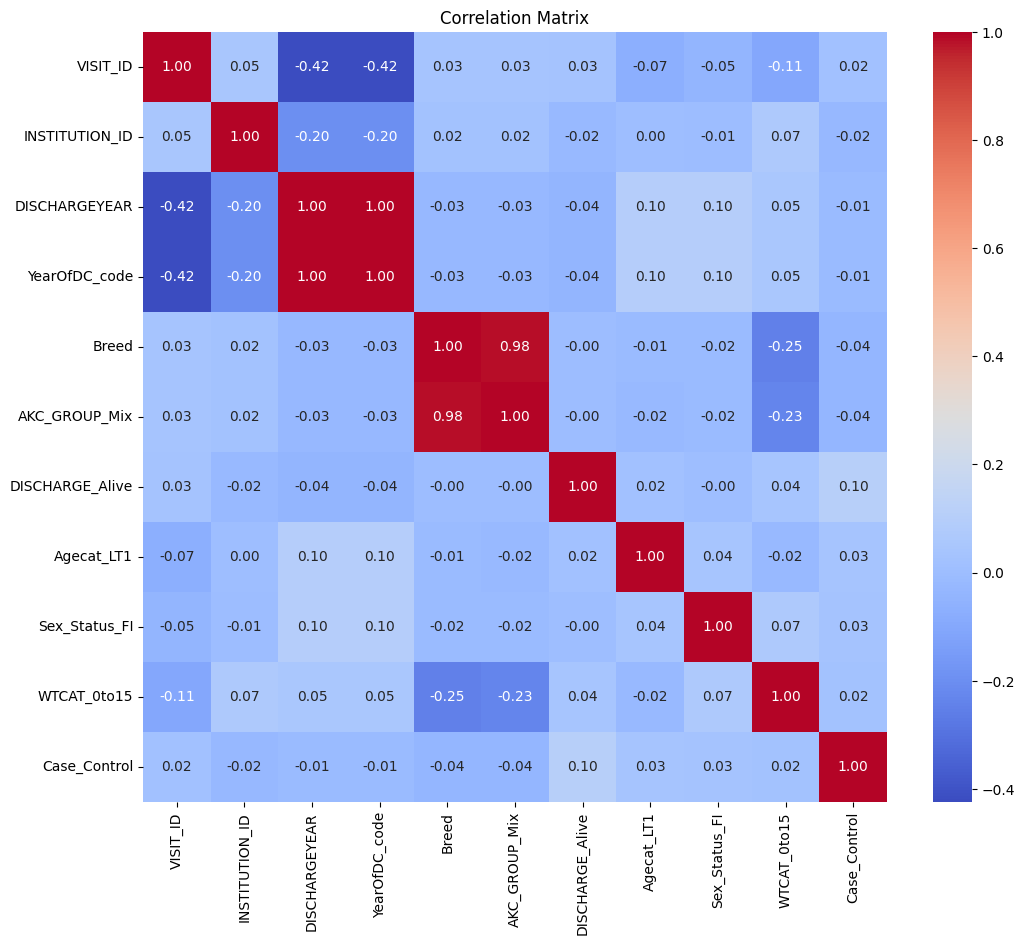

In [337]:
corr = df.corr()
plot_correlation_heatmap(corr)

#### Correlation with target

In [338]:
correlations = df.corr()['Case_Control'].sort_values(ascending=False)
correlations

Case_Control       1.000000
DISCHARGE_Alive    0.104821
Agecat_LT1         0.034472
Sex_Status_FI      0.027142
WTCAT_0to15        0.023662
VISIT_ID           0.015784
YearOfDC_code     -0.013267
DISCHARGEYEAR     -0.013267
INSTITUTION_ID    -0.024186
AKC_GROUP_Mix     -0.036076
Breed             -0.038441
Name: Case_Control, dtype: float64

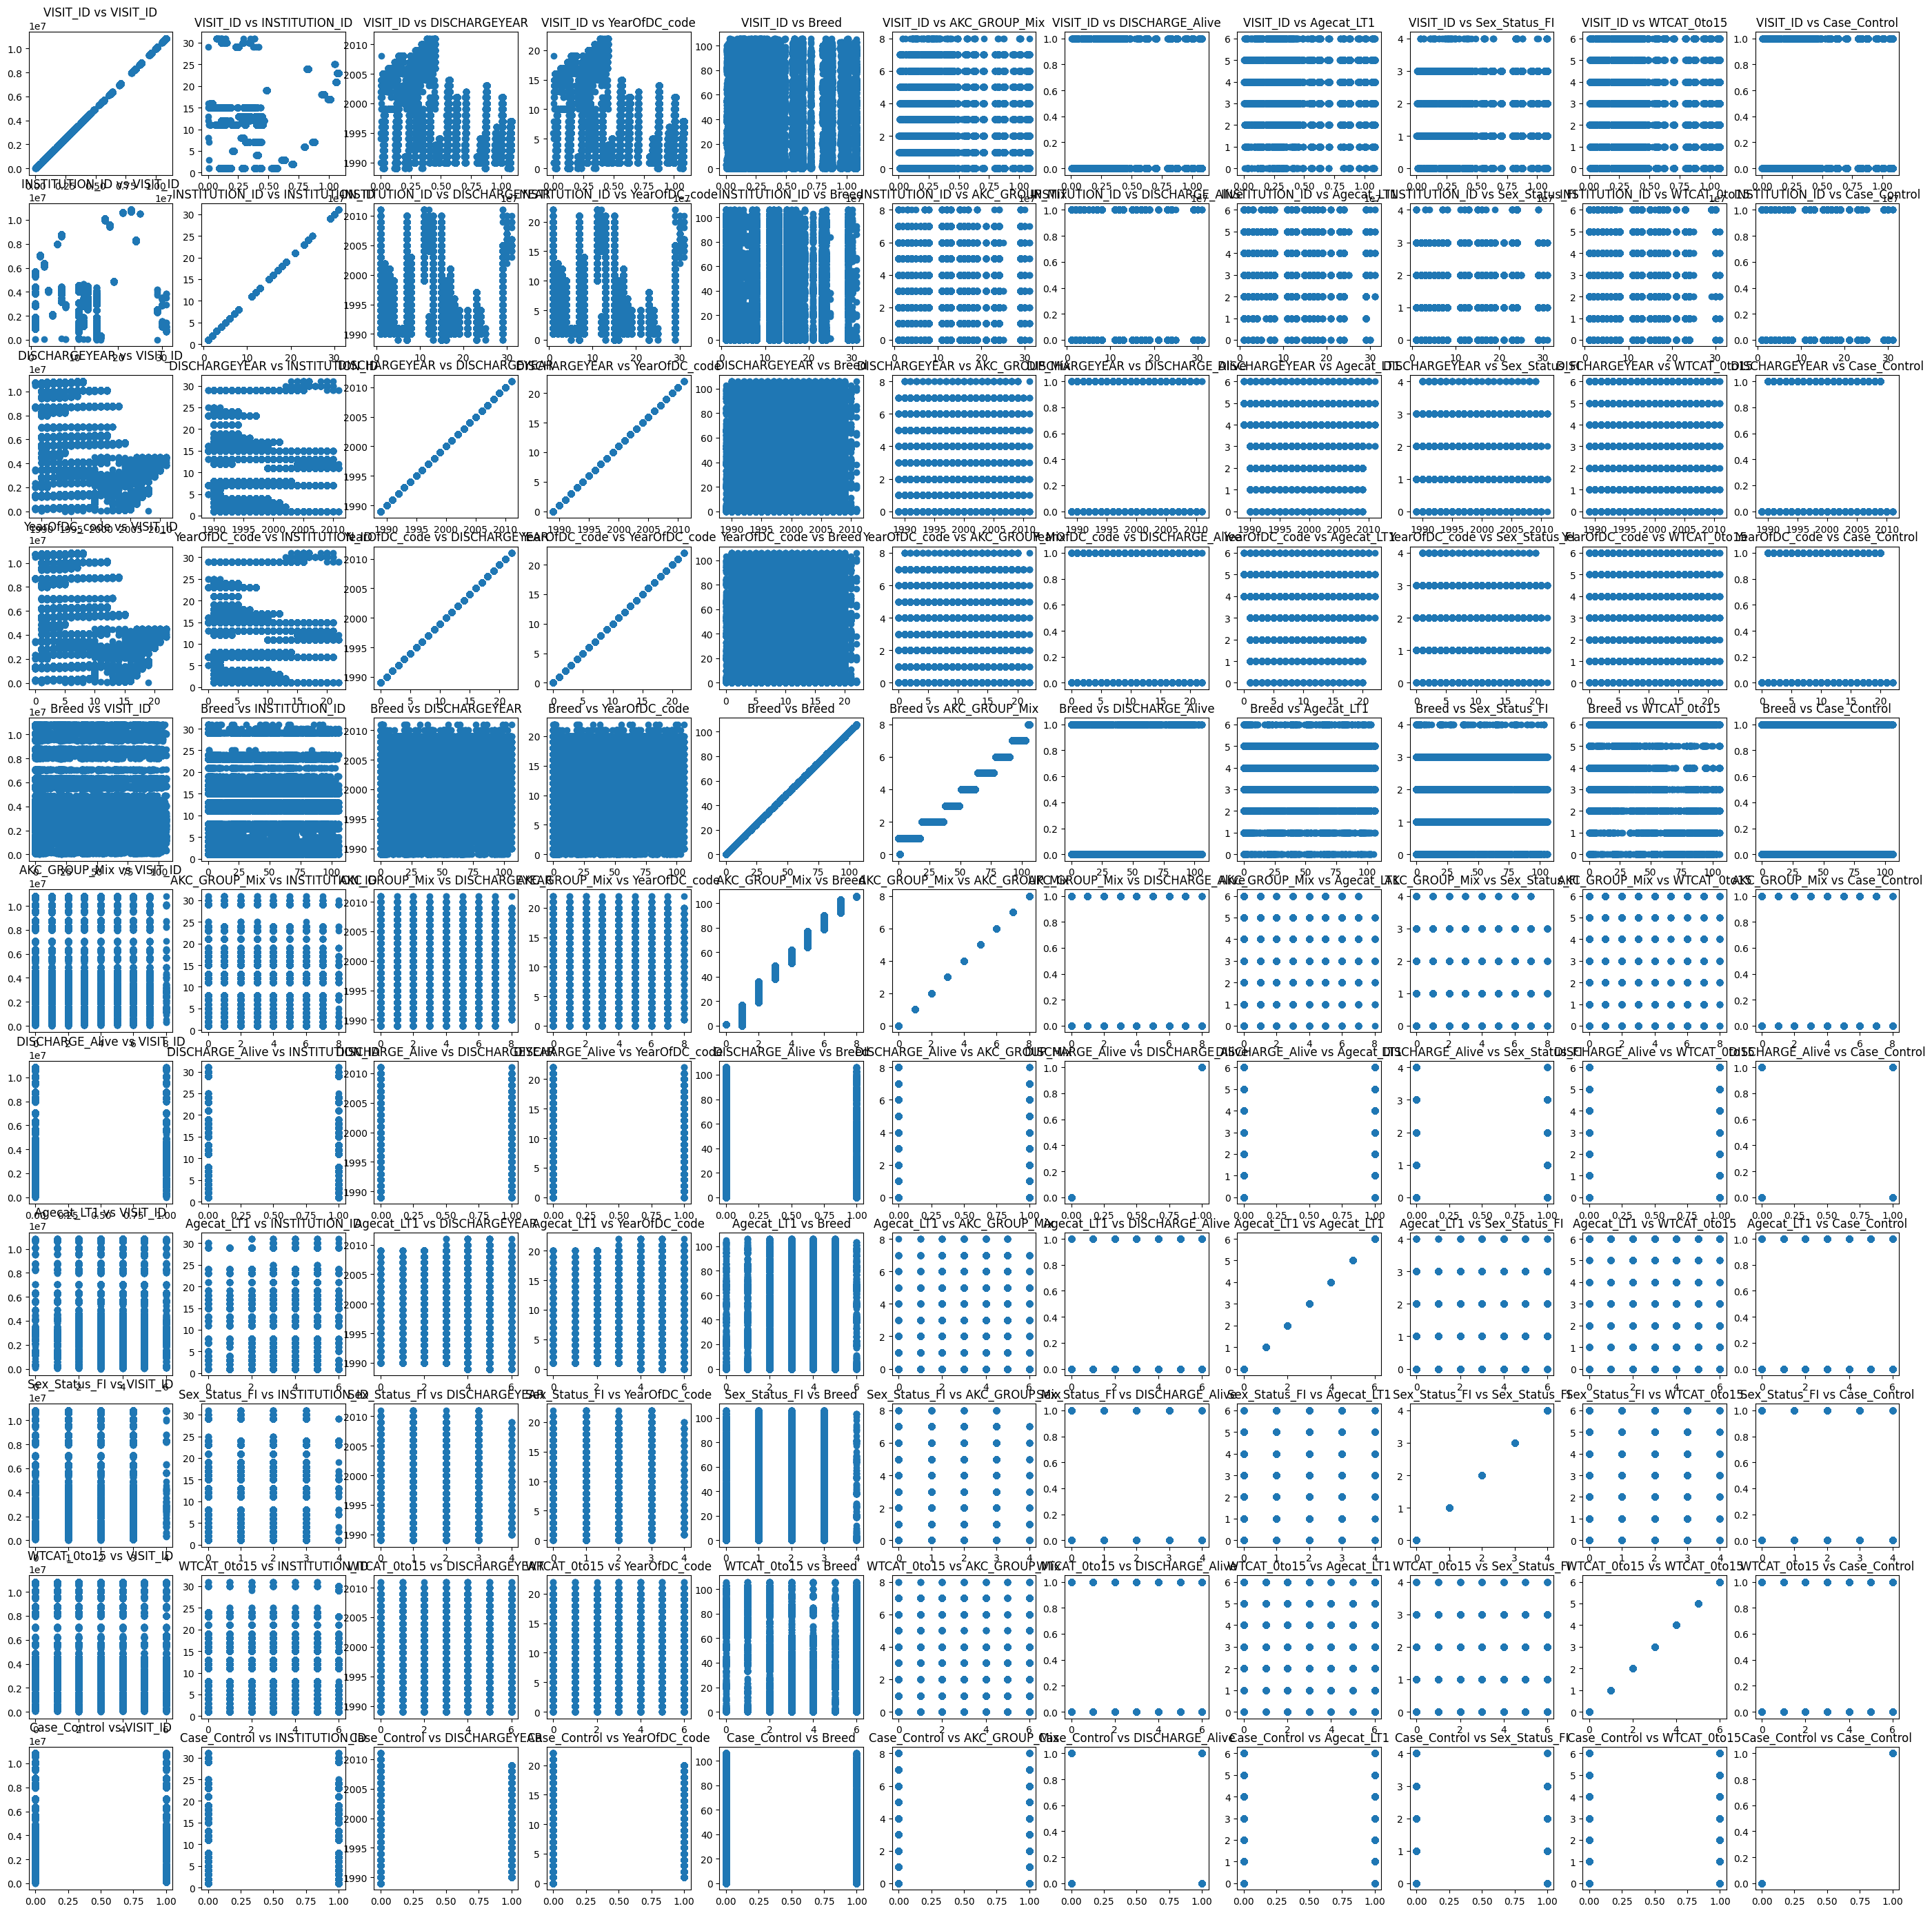

In [339]:
fig, axes = plt.subplots(11, 11, figsize=(35,35))
for i, column1 in enumerate(df.select_dtypes(include=np.number).columns):
    for j, column2 in enumerate(df.select_dtypes(include=np.number).columns):
        axes[i, j].scatter(df[column1], df[column2])
        axes[i, j].set_title(f'{column1} vs {column2}')

## **BY THE MOMENT, THERE IS NOT MORE TO DO IN EDA**

In [340]:
df

,VISIT_ID,INSTITUTION_ID,DISCHARGEYEAR,YearOfDC_code,Breed,AKC_GROUP_Mix,DISCHARGE_Alive,Agecat_LT1,Sex_Status_FI,WTCAT_0to15,Case_Control
0,1242402,1,2006,17,1,0,0,4,1,1,1
1,1198744,1,2006,17,1,0,0,5,1,2,1
3,1242535,1,2006,17,1,0,0,4,1,3,1
4,993414,1,2006,17,1,0,0,5,1,3,1
5,1086608,1,2006,17,1,0,0,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
67707,8246958,24,1990,1,106,8,0,3,3,3,0
67708,1176647,1,2007,18,106,8,0,3,3,3,0
67709,2569440,13,2000,11,106,8,0,5,1,4,0
67710,1505976,15,2007,18,106,8,0,3,1,4,0


In [341]:
# 1. Interacciones
df['age_weight_risk'] = df['Agecat_LT1'] * df['WTCAT_0to15']
df['breed_weight_interaction'] = df['Breed'] * df['WTCAT_0to15']
df['age_sex_interaction'] = df['Agecat_LT1'] * df['Sex_Status_FI']
df['breed_group_interaction'] = df['Breed'] * df['AKC_GROUP_Mix']

# 2. Variables binarias
df['is_senior'] = (df['Agecat_LT1'] >= 4).astype(int)
df['is_large_breed'] = (df['WTCAT_0to15'] >= 3).astype(int)
df['is_very_large'] = (df['WTCAT_0to15'] >= 4).astype(int)
df['is_young_adult'] = ((df['Agecat_LT1'] >= 1) & (df['Agecat_LT1'] <= 3)).astype(int)
df['is_neutered'] = ((df['Sex_Status_FI'] == 1) | (df['Sex_Status_FI'] == 3)).astype(int)
df['is_male'] = ((df['Sex_Status_FI'] == 2) | (df['Sex_Status_FI'] == 3)).astype(int)

# 3. Polinómicas
df['age_squared'] = df['Agecat_LT1'] ** 2
df['weight_squared'] = df['WTCAT_0to15'] ** 2
df['age_sqrt'] = np.sqrt(df['Agecat_LT1'])


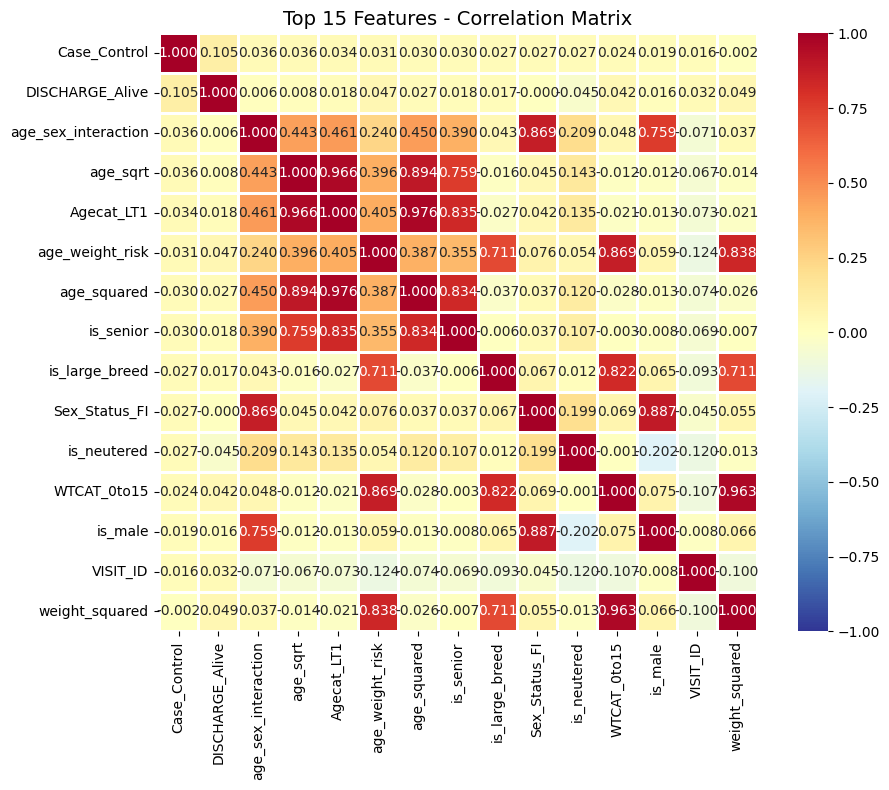

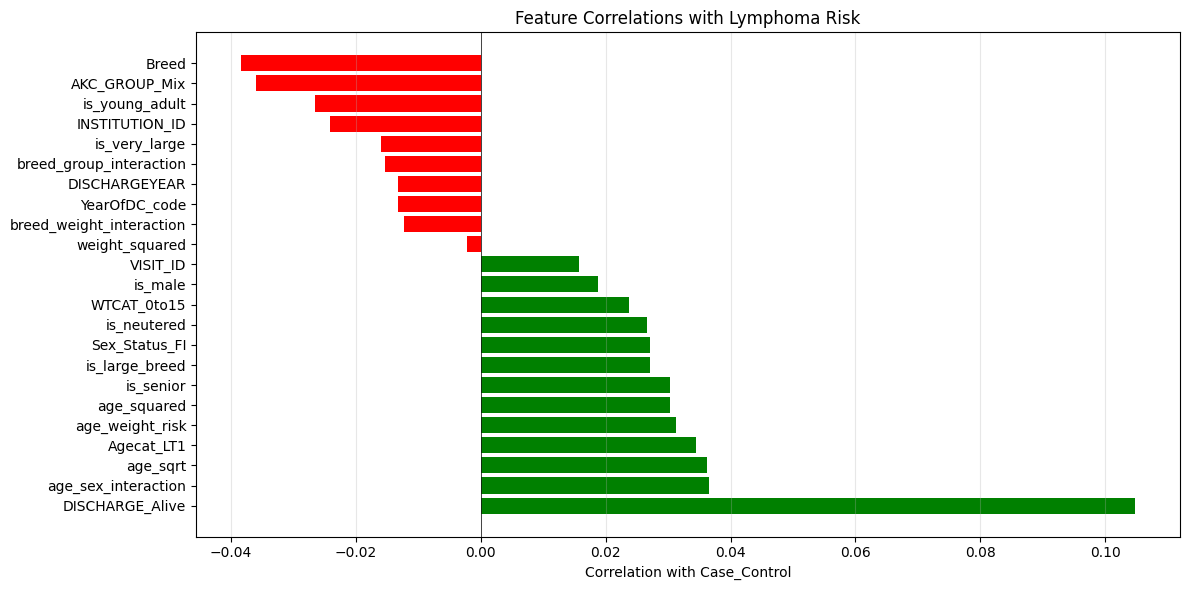


=== TOP CORRELATIONS WITH CASE_CONTROL ===
DISCHARGE_Alive        0.104821
age_sex_interaction    0.036497
age_sqrt               0.036292
Agecat_LT1             0.034472
age_weight_risk        0.031337
age_squared            0.030329
is_senior              0.030281
is_large_breed         0.027149
Sex_Status_FI          0.027142
is_neutered            0.026615
Name: Case_Control, dtype: float64

=== BOTTOM CORRELATIONS (NEGATIVE) ===
is_very_large    -0.015999
INSTITUTION_ID   -0.024186
is_young_adult   -0.026496
AKC_GROUP_Mix    -0.036076
Breed            -0.038441
Name: Case_Control, dtype: float64


In [342]:
plt.figure(figsize=(10, 8))
target_corr = df.corr()['Case_Control'].sort_values(ascending=False)
top_features = target_corr.head(15).index

# Matriz de correlación entre las top features
corr_subset = df[top_features].corr()
sns.heatmap(corr_subset, annot=True, fmt='.3f', cmap='RdYlBu_r', 
            center=0, vmin=-1, vmax=1, square=True, linewidths=1)
plt.title('Top 15 Features - Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

# 2. Barplot de correlaciones con target
plt.figure(figsize=(12, 6))
target_corr_filtered = target_corr[target_corr.index != 'Case_Control']
colors = ['green' if x > 0 else 'red' for x in target_corr_filtered.values]
plt.barh(target_corr_filtered.index, target_corr_filtered.values, color=colors)
plt.xlabel('Correlation with Case_Control')
plt.title('Feature Correlations with Lymphoma Risk')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== TOP CORRELATIONS WITH CASE_CONTROL ===")
print(target_corr_filtered.head(10))
print("\n=== BOTTOM CORRELATIONS (NEGATIVE) ===")
print(target_corr_filtered.tail(5))

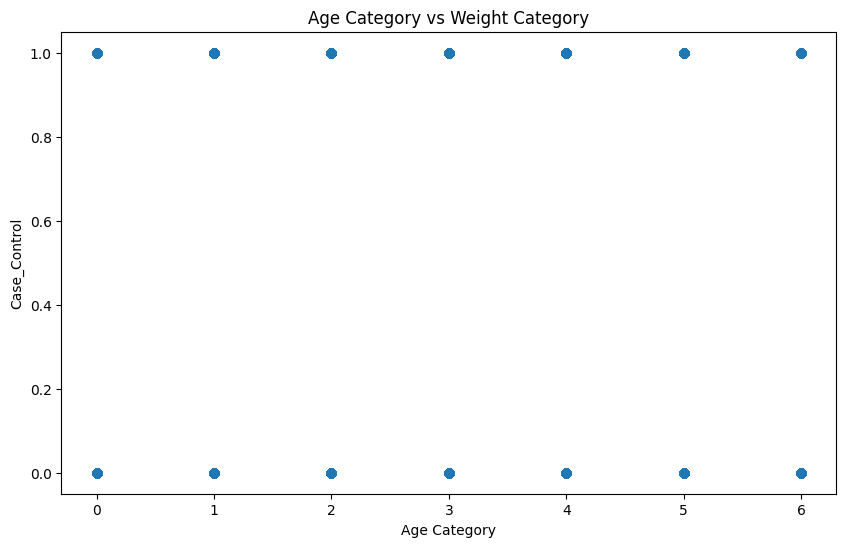

In [343]:
plt.figure(figsize=(10,6))
plt.title("Age Category vs Weight Category")
plt.scatter(x=df["Agecat_LT1"], y=df["Case_Control"])
plt.xlabel("Age Category")
plt.ylabel("Case_Control")
plt.show()

# TRAINING

### CLASS BALANCE

In [344]:
print(df['Case_Control'].value_counts())
print("\nproportion:")
print(df['Case_Control'].value_counts(normalize=True))

Case_Control
0    48886
1    16854
Name: count, dtype: int64

proportion:
Case_Control
0    0.743626
1    0.256374
Name: proportion, dtype: float64


In [345]:
from tensorflow import keras
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter

In [346]:
X = df.drop('Case_Control', axis=1)
y = df['Case_Control']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (65740, 23)
Target shape: (65740,)


In [347]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (52592, 23), (52592,)
Test set shape: (13148, 23), (13148,)


In [348]:
print(f"\nTrain class distribution:")
print(pd.Series(y_train).value_counts(normalize=True))
print(f"\nTest class distribution:")
print(pd.Series(y_test).value_counts(normalize=True))


Train class distribution:
Case_Control
0    0.74363
1    0.25637
Name: proportion, dtype: float64

Test class distribution:
Case_Control
0    0.743611
1    0.256389
Name: proportion, dtype: float64


In [349]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nScaled features shape: {X_train_scaled.shape}")


Scaled features shape: (52592, 23)


In [350]:
smote = SMOTE(random_state=42, sampling_strategy=0.8)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)
Counter(y_resampled)

Counter({1: 31287, 0: 39109})

In [351]:
X_train_scaled

array([[-0.90467894,  0.42858053, -0.70551057, ...,  1.30691616,
         1.5731562 ,  1.00539664],
       [-0.56474786,  2.32698632,  0.85069284, ...,  0.11563754,
         1.5731562 ,  0.2869609 ],
       [-0.92096534,  0.42858053, -1.22424505, ..., -0.81091249,
        -0.84366759, -0.5285003 ],
       ...,
       [-0.22440441,  0.15737971, -1.22424505, ...,  0.11563754,
         0.74237302,  0.2869609 ],
       [-0.88004996,  0.42858053, -0.01386461, ...,  0.11563754,
        -0.46603887,  0.2869609 ],
       [ 1.46577583, -0.65622277, -0.35968759, ...,  1.30691616,
        -0.46603887,  1.00539664]])

In [367]:
classes = np.unique(y_resampled)
class_weights = compute_class_weight('balanced', classes=classes, y=y_resampled)
class_weight_dict = dict(zip(classes, class_weights))
class_weight_dict

{0: 0.8999974430438007, 1: 1.1250039952696007}

In [353]:
from keras import layers, callbacks

In [369]:
model = keras.Sequential([
    # Primera capa: 64 neuronas (7x tu número de features)
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    
    # Segunda capa: 32 neuronas
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    # Tercera capa: 16 neuronas
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    
    # Capa de salida: 1 neurona con sigmoid
    layers.Dense(1, activation='sigmoid')
])
model

In [362]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])
model

In [370]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 64)                1536      
                                                                 
 batch_normalization_11 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_23 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_12 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dropout_24 (Dropout)        (None, 32)               

In [371]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

In [372]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc')
    ]
)

In [373]:
history = model.fit(
    X_train_scaled, 
    y_train,
    validation_split=0.2,  # 20% del train para validación
    epochs=100,
    batch_size=64,
    class_weight=class_weight_dict,  # Maneja el desbalance de clases
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)
history

Epoch 1/100
658/658 [==============================] - 3s 3ms/step - loss: 0.6195 - accuracy: 0.6956 - precision: 0.2751 - recall: 0.1162 - auc: 0.5334 - val_loss: 0.5696 - val_accuracy: 0.7414 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5869 - lr: 0.0010
Epoch 2/100
658/658 [==============================] - 1s 2ms/step - loss: 0.5845 - accuracy: 0.7414 - precision: 0.3638 - recall: 0.0148 - auc: 0.5601 - val_loss: 0.5666 - val_accuracy: 0.7415 - val_precision: 1.0000 - val_recall: 3.6765e-04 - val_auc: 0.6039 - lr: 0.0010
Epoch 3/100
658/658 [==============================] - 1s 2ms/step - loss: 0.5773 - accuracy: 0.7433 - precision: 0.4571 - recall: 0.0183 - auc: 0.5797 - val_loss: 0.5603 - val_accuracy: 0.7431 - val_precision: 0.6607 - val_recall: 0.0136 - val_auc: 0.6093 - lr: 0.0010
Epoch 4/100
658/658 [==============================] - 1s 2ms/step - loss: 0.5737 - accuracy: 0.7432 - precision: 0.4636 - recall: 0.0237 - auc: 0.5941 - val_loss: 0.5627 - val_a

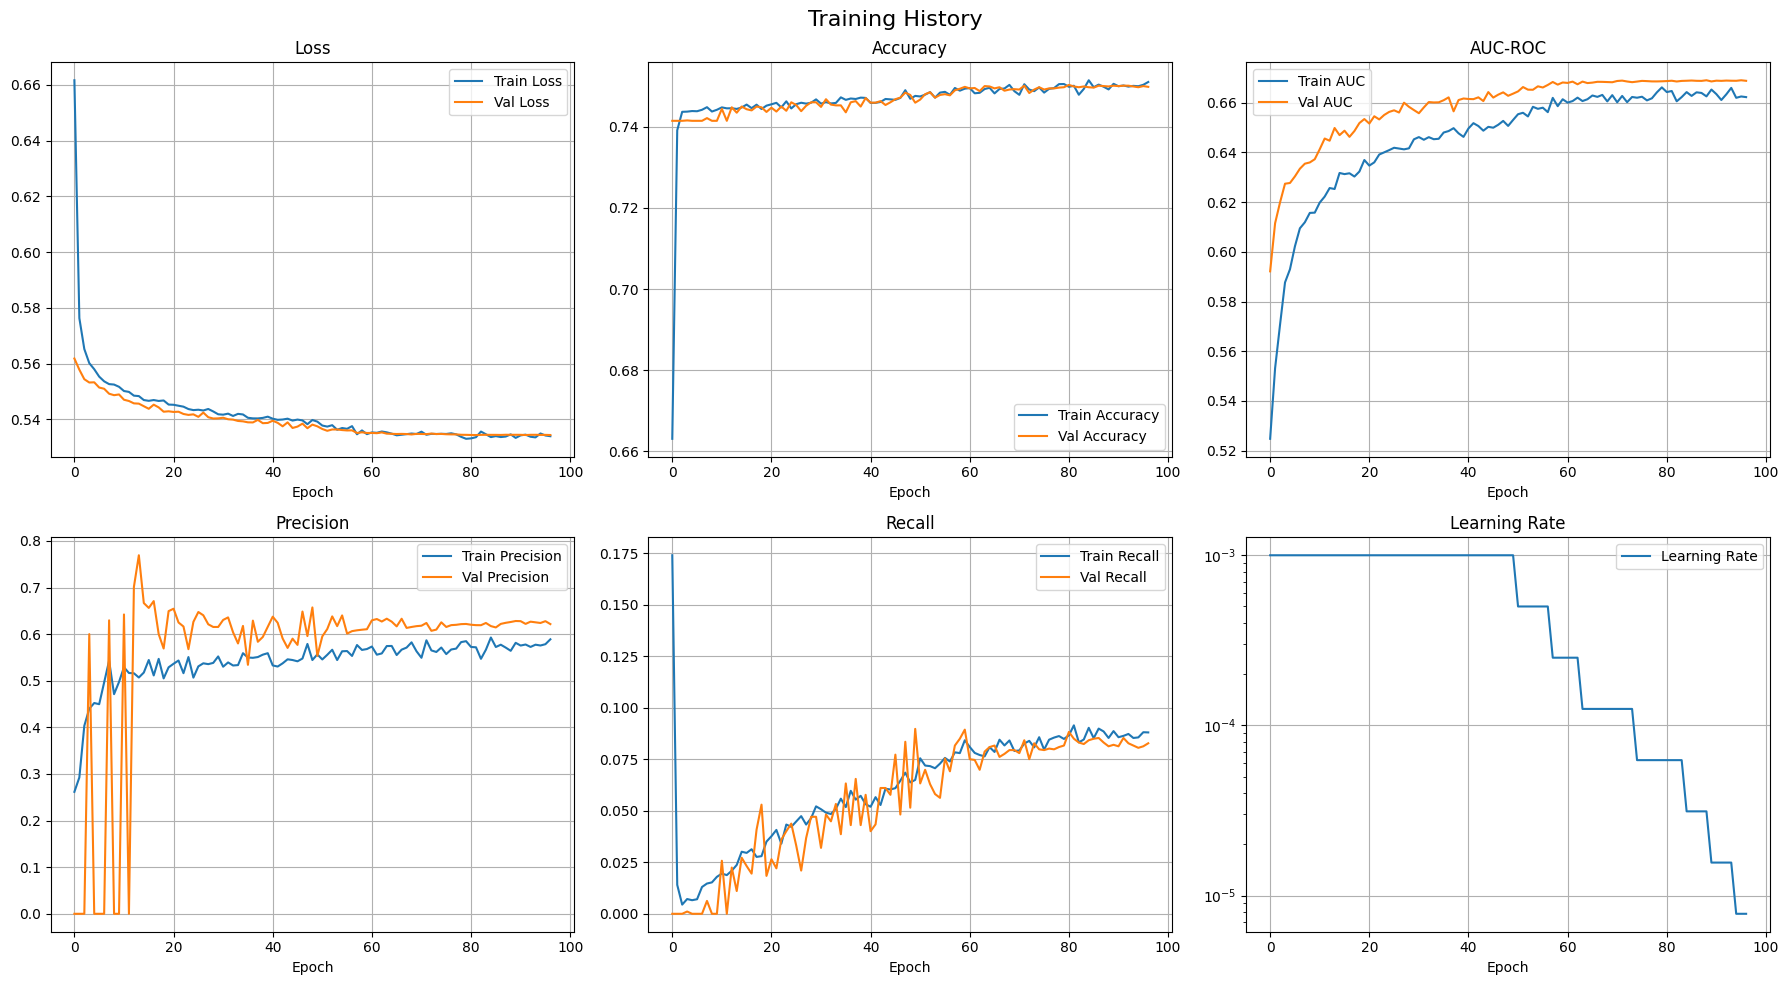

In [359]:
# TRAINING HISTORY VISUALIZATION

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Training History', fontsize=16)

# Loss
axes[0, 0].plot(history.history['loss'], label='Train Loss')
axes[0, 0].plot(history.history['val_loss'], label='Val Loss')
axes[0, 0].set_title('Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Accuracy
axes[0, 1].plot(history.history['accuracy'], label='Train Accuracy')
axes[0, 1].plot(history.history['val_accuracy'], label='Val Accuracy')
axes[0, 1].set_title('Accuracy')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].legend()
axes[0, 1].grid(True)

# AUC
axes[0, 2].plot(history.history['auc'], label='Train AUC')
axes[0, 2].plot(history.history['val_auc'], label='Val AUC')
axes[0, 2].set_title('AUC-ROC')
axes[0, 2].set_xlabel('Epoch')
axes[0, 2].legend()
axes[0, 2].grid(True)

# Precision
axes[1, 0].plot(history.history['precision'], label='Train Precision')
axes[1, 0].plot(history.history['val_precision'], label='Val Precision')
axes[1, 0].set_title('Precision')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Recall
axes[1, 1].plot(history.history['recall'], label='Train Recall')
axes[1, 1].plot(history.history['val_recall'], label='Val Recall')
axes[1, 1].set_title('Recall')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Learning Rate
if 'lr' in history.history:
    axes[1, 2].plot(history.history['lr'], label='Learning Rate')
    axes[1, 2].set_title('Learning Rate')
    axes[1, 2].set_xlabel('Epoch')
    axes[1, 2].set_yscale('log')
    axes[1, 2].legend()
    axes[1, 2].grid(True)
else:
    axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

In [360]:
# MODEL EVALUATION

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Predicciones en el conjunto de test
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

print("=== MODEL EVALUATION ON TEST SET ===\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Control (0)', 'Case (1)']))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print(f"\nTrue Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")

411/411 [==============================] - 0s 827us/step
=== MODEL EVALUATION ON TEST SET ===

Classification Report:
              precision    recall  f1-score   support

 Control (0)       0.76      0.98      0.85      9777
    Case (1)       0.58      0.08      0.14      3371

    accuracy                           0.75     13148
   macro avg       0.67      0.53      0.49     13148
weighted avg       0.71      0.75      0.67     13148


ROC-AUC Score: 0.6605

Confusion Matrix:
[[9592  185]
 [3112  259]]

True Negatives: 9592
False Positives: 185
False Negatives: 3112
True Positives: 259


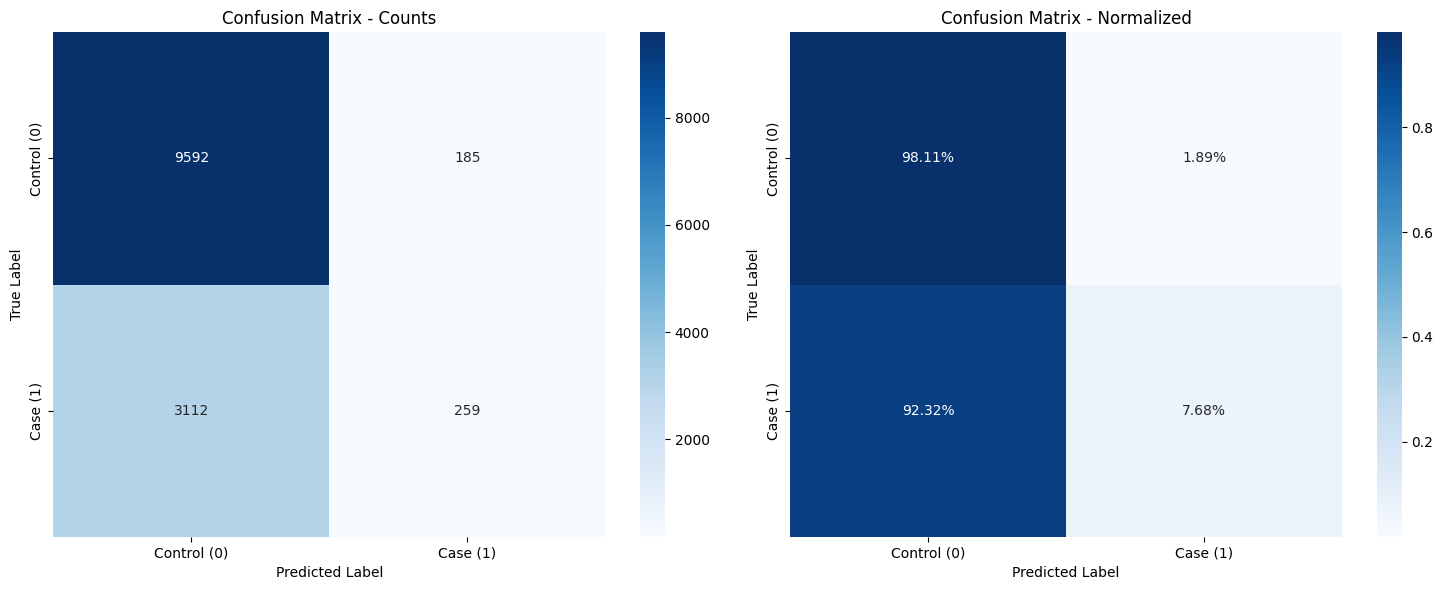

In [361]:
# CONFUSION MATRIX VISUALIZATION

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Confusion Matrix - Counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Control (0)', 'Case (1)'],
            yticklabels=['Control (0)', 'Case (1)'])
axes[0].set_title('Confusion Matrix - Counts')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Confusion Matrix - Normalized
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', ax=axes[1],
            xticklabels=['Control (0)', 'Case (1)'],
            yticklabels=['Control (0)', 'Case (1)'])
axes[1].set_title('Confusion Matrix - Normalized')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()